# Basic Concept

1. 소리

- 공기나 물 같은 매질의 진동을 통해 전달되는 파동

2. WaveForm

- 진폭(amplitude) : 진동 중심에서 최대 변위의 크기 / 소리의 세기와 관련

- 파장(wavelength) : 같은 변위(위상)을 가진 서로 이웃한 두 점 사이의 거리 

- 주기(period) : 매질의 한 점이 1회 진동하는데 걸린 시간

- 진동수(frequency) : 파동 전파시 매질의 한 점이 1초 동안 진동한 횟수 / 소리의 높이와 관련

3. 고속 푸리에 변환(FFT)

- 임의의 입력 신호를 다양한 주파수를 갖는 주기함수들의 합으로 분해하여 표현하는 것(sin, cos함수)

- waveform의 시간 영역(time domain)에서 -> 주파수 영역(frequency domain)의 함수로 변환

4. STFT(Short-Time Furier Transform)

- 푸리에 변환은 시간의 흐름에 따라 신호의 주파수가 변했을 경우에, 어느 시간대에 주파수가 어떻게 변했는지를 알수가 없음

- 따라서 주파수 성분이 시간의 흐름에 따라 어떻게 변하는지 분석한 것이 STFT

5. MFCC(Mel-Frequency Cepstral Coefficient)

- Mel Spectrum(멜 스펙트럼)에서 Cepstral(켑스트럴) 분석을 통해 추출하는 방식

# musicnet data download

In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mugan1","key":"1e7737f2708c99e5cec5976bb162f6fb"}'}

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
# Permission Warning 이 일어나지 않도록 
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d imsparsh/musicnet-dataset

100% 21.5G/21.5G [05:27<00:00, 70.6MB/s]
100% 21.5G/21.5G [05:27<00:00, 70.4MB/s]


In [ ]:
!unzip musicnet-dataset.zip

In [1]:
# import library

import numpy as np
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
import glob 
plt.style.use('seaborn-white')

In [5]:
piano_path = '/content/musicnet/musicnet/train_data/2225.wav'
violin_path = '/content/musicnet/musicnet/train_data/2186.wav'
cello_path = '/content/musicnet/musicnet/train_data/2217.wav'

In [16]:
# make signal, sample rate, np

def load_signal(file_path) :
  signal, sr = librosa.load(file_path, sr=None, offset=5, duration=15) 

  return signal, sr 

def make_np(signal) :
  return np.array(signal, np.float32)

piano_signal, sr = load_signal(piano_path)
violin_signal, sr = load_signal(violin_path)
cello_signal, sr = load_signal(cello_path)

piano_np = make_np(piano_signal)
violin_np = make_np(violin_signal)
cello_np = make_np(cello_signal)

# wave 그래프 비교 

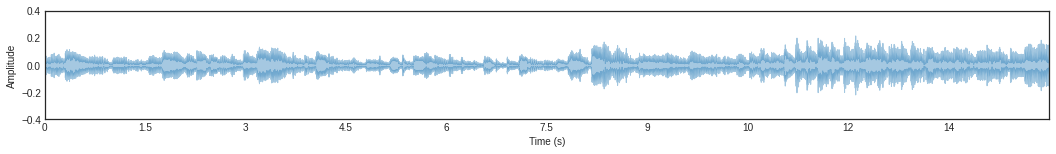

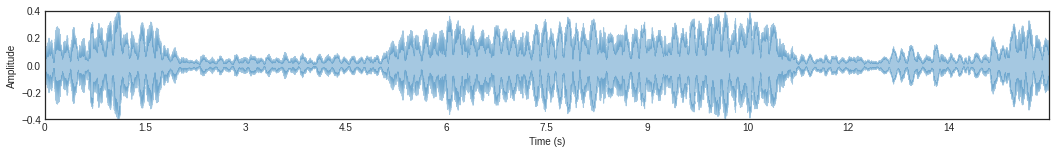

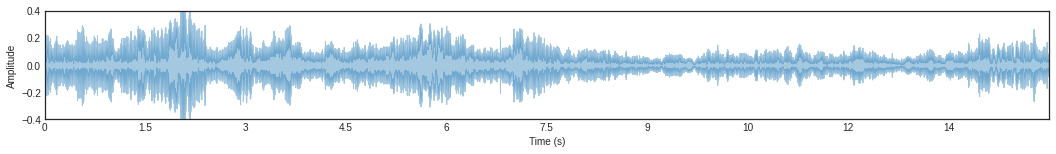

In [24]:
# WAVEFORM 

signal_list = [piano_signal,violin_signal, cello_signal]

for signal in signal_list:
  plt.figure(figsize=(18,2))
  librosa.display.waveplot(signal, sr, alpha=0.4) 
  plt.xlabel("Time (s)") 
  plt.ylim((-0.4,0.4))
  plt.ylabel("Amplitude") 

# FFT

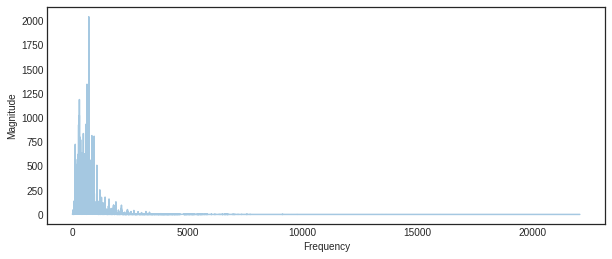

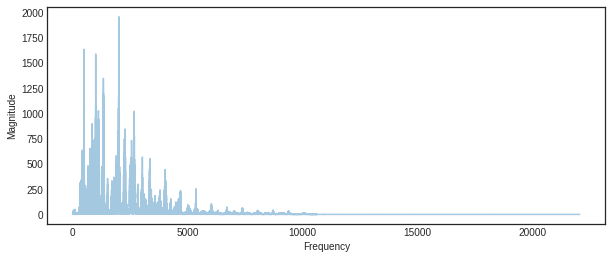

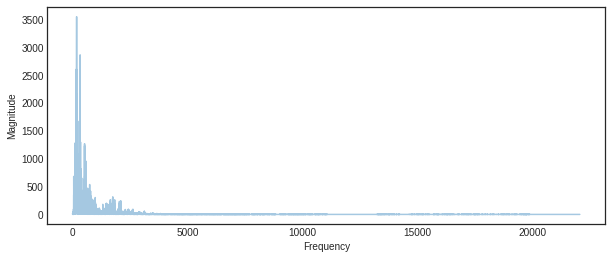

In [25]:
for signal in signal_list:

  fft = np.fft.fft(signal) 
  spectrum = np.abs(fft) 
  f = np.linspace(0, piano_sr, len(spectrum)) 
  left_spectrum = spectrum[:int(len(spectrum)/2)] 
  left_f = f[:int(len(spectrum)/2)] 
  plt.figure(figsize=(10,4)) 
  plt.plot(left_f, left_spectrum, alpha=0.4)
  plt.xlabel("Frequency") 
  plt.ylabel("Magnitude") 

# STFT 

/usr/local/lib/python3.7/dist-packages/librosa/display.py:1336: UserWarning: Frequency axis exceeds Nyquist. Did you remember to set all spectrogram parameters in specshow?
  "Frequency axis exceeds Nyquist. "


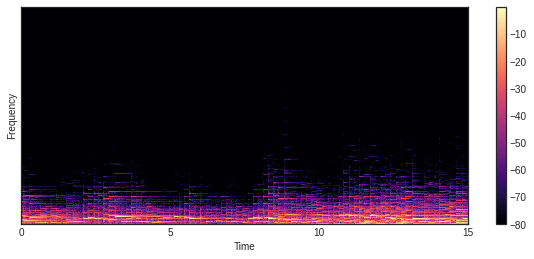

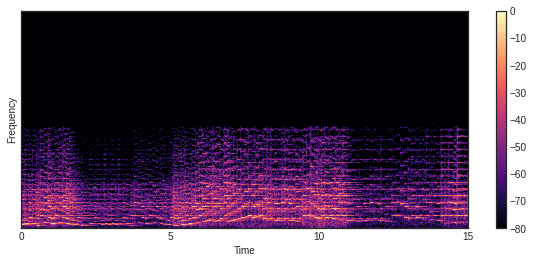

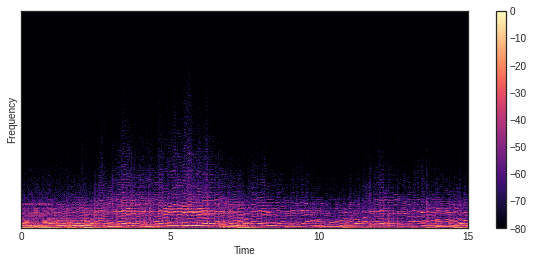

In [29]:
hop_length = 512 # in num. of samples 
n_fft = 2048 # window in num. of samples

for signal in signal_list :

  stft = librosa.stft(signal, n_fft=n_fft, hop_length=hop_length) 
  spectrogram = np.abs(stft) 
  plt.figure(figsize=(10,4)) 
  amp_db = librosa.amplitude_to_db(np.abs(spectrogram), ref=np.max)
  librosa.display.specshow(amp_db, sr=sr, hop_length=hop_length, ) 
  plt.xlabel("Time") 
  plt.ylabel("Frequency") 
  plt.colorbar() 

# MFCC

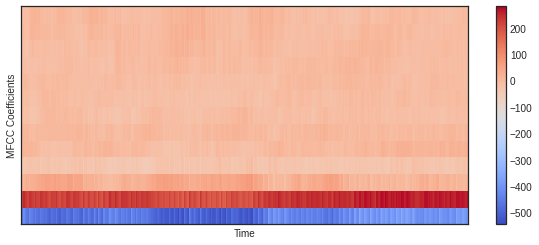

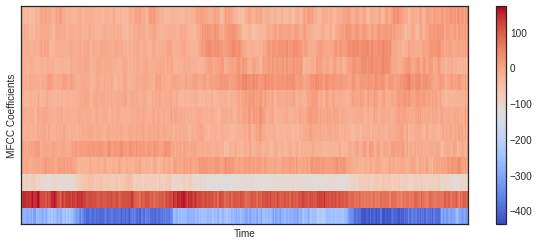

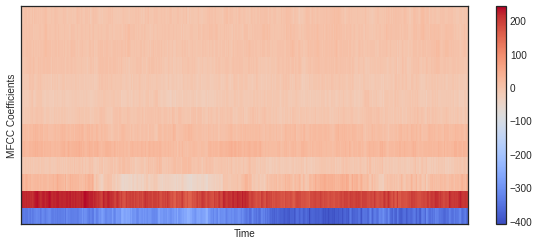

In [30]:
# Extract 13 MFCCs 

for signal in signal_list :
  plt.figure(figsize=(10,4)) 
  MFCCs = librosa.feature.mfcc(signal, sr, n_fft=n_fft, hop_length=hop_length, n_mfcc=13) 
  amp_db = librosa.amplitude_to_db(np.abs(MFCCs), ref=np.max)
  librosa.display.specshow(MFCCs, sr=sr, hop_length=hop_length) 
  plt.xlabel("Time") 
  plt.ylabel("MFCC Coefficients") 
  plt.colorbar() 

# Constant Q

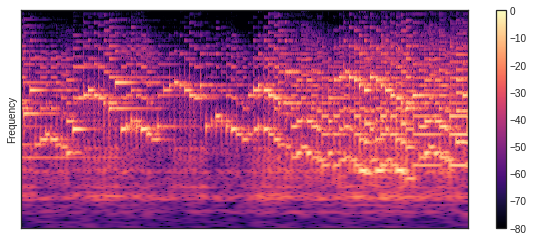

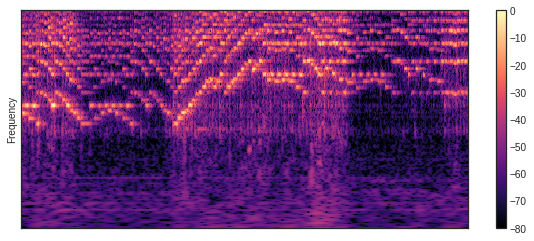

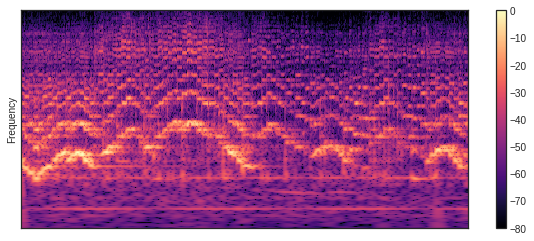

In [34]:
for signal in signal_list : 
  plt.figure(figsize=(10,4))
  ret = librosa.cqt(signal, sr, hop_length=hop_length, n_bins=24*7, bins_per_octave=24)
  ret = np.abs(ret)
  amp_db = librosa.amplitude_to_db(np.abs(ret), ref=np.max)
  librosa.display.specshow(amp_db, sr=sr)
  plt.ylabel("Frequency") 
  plt.colorbar()
  plt.show();

# 피아노/바이올린/첼로 주파수

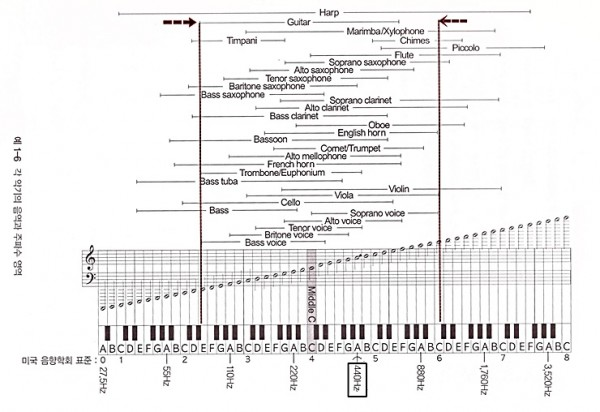

# 분석 결과

- spectogram으로 본 피아노, 바이올린, 첼로의 특징은 상이함
- 연주 가능한 주파수 영역 또한 다름(피아노가 연주 가능 영역이 가장 넓으며, 베이스 파트는 첼로, 소프라노 파트는 바이올린이 담당)
- 같은 주파수로 연주하더라도(같은 음으로 연주함을 의미), 배음에 따라서 다른 음색과 파형을 지니게 됨
- 배음이란 하나의 음을 구성하는 여러 부분음들 중, 기본음보다 높은 정수배의 진동수를 갖는 모든 상음이며, 악기의 한 음은 여러 배음으로 구성된 합성파임 

# Preprocessing Data 

In [36]:
import pandas as pd

metadata = pd.read_csv('musicnet_metadata.csv')
metadata.ensemble.unique()

array(['Piano Quintet', 'Solo Piano', 'Piano Trio', 'Viola Quintet',
       'String Quartet', 'Clarinet Quintet',
       'Pairs Clarinet-Horn-Bassoon', 'Wind Quintet', 'Accompanied Cello',
       'Accompanied Clarinet', 'Wind and Strings Octet', 'String Sextet',
       'Piano Quartet', 'Horn Piano Trio', 'Solo Violin', 'Solo Flute',
       'Solo Cello', 'Violin and Harpsichord',
       'Clarinet-Cello-Piano Trio', 'Accompanied Violin', 'Wind Octet'],
      dtype=object)

In [37]:
import glob
wav_path = glob.glob('/content/musicnet/musicnet/*/*.wav')
midi_path = glob.glob('/content/musicnet_midis/musicnet_midis/*/*.mid')

In [38]:
import pandas as pd

metadata = pd.read_csv('musicnet_metadata.csv')
string_list = []
string_wav = []
for i, en in enumerate(metadata.ensemble) :
  if 'Violin' in en or 'Cello' in en or 'String' in en or 'Viola' in en:
    string_wav.append(metadata.id[i])
    string_list.append(en)

In [39]:
midi_path_sorted = []
wav_path_sorted = []
for id in string_wav :
  for i in range(len(midi_path)) : 
    if str(id) in midi_path[i] :
      midi_path_sorted.append(midi_path[i])
    if str(id) in wav_path[i] :
      wav_path_sorted.append(wav_path[i])

In [40]:
import shutil

for i in range(len(midi_path_sorted)) :
  shutil.copy(midi_path_sorted[i], '/content/string/midi')
  shutil.copy(wav_path_sorted[i], '/content/string/wav')

In [41]:
wav_path_tfr = glob.glob('/content/string/wav/*.wav')
midi_path_tfr = glob.glob('/content/string/midi/*.mid')

In [42]:
musicnet_df = pd.DataFrame({'audio_filename' : wav_path_tfr, 'midi_filename' : midi_path_tfr})
split_list = ['train']*122
musicnet_df['split']=split_list

In [43]:
musicnet_df.to_csv('string.csv')

In [44]:
musicnet_df

,audio_filename,midi_filename,split
0,/content/string/wav/2501.wav,/content/string/midi/1916_dvq10m1.mid,train
1,/content/string/wav/1805.wav,/content/string/midi/2502_lvb12n3c.mid,train
2,/content/string/wav/2432.wav,/content/string/midi/2131_bra11-6.mid,train
3,/content/string/wav/2221.wav,/content/string/midi/2221_cs3-5bou.mid,train
4,/content/string/wav/2295.wav,/content/string/midi/2480_qt05_1.mid,train
...,...,...,...
117,/content/string/wav/2497.wav,/content/string/midi/2217_cs3-1pre.mid,train
118,/content/string/wav/1807.wav,/content/string/midi/2218_cs3-2all.mid,train
119,/content/string/wav/2330.wav,/content/string/midi/2140_br51n1m4.mid,train
120,/content/string/wav/2147.wav,/content/string/midi/2180_gr_rqtf4.mid,train
